In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create named columns to the DataFrame

cols = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'classification']
df = pd.read_csv("nursery.data.csv", header=None, names=cols)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents           12960 non-null object
has_nurs          12960 non-null object
form              12960 non-null object
children          12960 non-null object
housing           12960 non-null object
finance           12960 non-null object
social            12960 non-null object
health            12960 non-null object
classification    12960 non-null object
dtypes: object(9)
memory usage: 911.3+ KB


In [4]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,classification
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,critical,foster,3,less_conv,convenient,problematic,not_recom,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,classification
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [6]:
# Transforming the target column: classification. In a numeric representation
from sklearn.preprocessing import LabelEncoder

classification_le = LabelEncoder()
classification_labels = classification_le.fit_transform(df['classification'])
classification_labels

array([2, 1, 0, ..., 3, 3, 0])

In [7]:
# Creating initial numeric DataFrame

numeric_frame = pd.DataFrame(classification_labels, columns=['classificationLabel'])
numeric_frame.head()

,classificationLabel
0,2
1,1
2,0
3,2
4,1


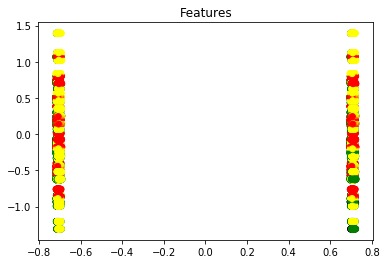

In [8]:
from sklearn.decomposition import PCA

features = pd.get_dummies(df.drop('classification', axis=1))
pca = PCA(n_components=2)
features2d = pca.fit_transform(features)
target = numeric_frame.classificationLabel

col = {
    0:'red',
    1:'green',
    2:'blue',
    3:'yellow',
    4:'black'
}

x = [a[0] for a in features2d]
y = [a[1] for a in features2d]
colors = [col[i] for i in target]
plt.title('Features')
plt.scatter(x, y, c = colors)
plt.show()


In [9]:
numeric_frame = pd.concat([numeric_frame, features], axis=1)
numeric_frame.to_csv('numeric_nursery_data.csv', sep=',', encoding='utf-8')
numeric_frame.head()

,classificationLabel,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,2,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,2,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [10]:
# Create arrays for the features and the response variable
y = numeric_frame['classificationLabel'].values
X = numeric_frame.drop('classificationLabel', axis=1).values


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42, stratify = numeric_frame.classificationLabel)

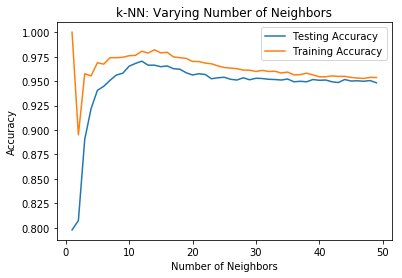

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_test = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_test.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_test.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn_test.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
best_n_neighbors = neighbors[np.argmax(test_accuracy)]
print('The best value for n_neighborn is: ' + str(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
score

The best value for n_neighborn is: 12


0.9704218106995884

In [14]:
classification_mappings = {index: label for index, label in 
                  enumerate(classification_le.classes_)}
classification_mappings

{0: 'not_recom',
 1: 'priority',
 2: 'recommend',
 3: 'spec_prior',
 4: 'very_recom'}

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
labels = list(classification_mappings.keys())
confusion_matrix(y_test, y_pred, labels=labels)

array([[1296,    0,    0,    0,    0],
       [   0, 1253,    0,   27,    0],
       [   0,    0,    0,    0,    1],
       [   0,   40,    0, 1173,    0],
       [   0,   47,    0,    0,   51]])

In [16]:
from sklearn.externals import joblib

joblib.dump(knn, 'nursery_knn_v1.pkl')

['nursery_knn_v1.pkl']